In [13]:
# Imports
from logr_utils import sigmoid, logistic_sigmoid_regression, min_max_normalize

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB

# Read the data
data = pd.read_csv('data/admission.csv')

# Ensure no trailing spaces within the columns
data.columns = data.columns.str.strip()

# Engineer the 'Admit' (target) column
data['Admit'] = (data['Chance of Admit'] >= 0.75).astype(int)

# Train test split
train_data = data.iloc[:350]
test_data = data.iloc[350:]

# Extract data
X_train = train_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
Xbar_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Add intercept term

y_train = train_data['Admit'].values

X_test = test_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
Xbar_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))  # Add intercept term

y_test = test_data['Admit'].values

data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [14]:
# Normalize training and test data
X_train_normalized = min_max_normalize(X_train)
X_test_normalized = min_max_normalize(X_test)

# Intercept Term Inclusion
Xbar_train = np.hstack((np.ones((X_train_normalized.shape[0], 1)), X_train_normalized))
Xbar_test = np.hstack((np.ones((X_test_normalized.shape[0], 1)), X_test_normalized))

# Initialize weights
np.random.seed(42)
initial_weights = np.random.randn(Xbar_train.shape[1], 1) * 0.01

# Define learning rate
eta = 0.01

# Perform Logistic Regression
weights = logistic_sigmoid_regression(Xbar_train.T, y_train, initial_weights, eta)

# Make predictions on the test set
y_pred_prob = sigmoid(np.dot(Xbar_test, weights[-1]))
y_pred = (y_pred_prob >= 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Print the final coefficients
final_weights = weights[-1].flatten()
print("\nFinal Coefficients:")
for feature, weight in zip(['Intercept', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research'], final_weights):
    print(f"{feature}: {weight:.4f}")

Accuracy: 0.8800
Precision: 0.8333
Recall: 0.9091

Final Coefficients:
Intercept: -4.2017
GRE Score: 1.1298
TOEFL Score: 1.1697
University Rating: 1.7591
SOP: 0.8473
LOR: 0.4940
CGPA: 0.9536
Research: 1.1065


In [15]:
# Sci-kit Learn Logistic Regression implementation

# Normalize the features
scaler = StandardScaler()
X_sk_train_normalized = scaler.fit_transform(X_train)
X_sk_test_normalized = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=10000)

# Fit the model to the normalized training data
model.fit(X_sk_train_normalized, y_train)

# Make predictions on the normalized test set
y_pred = model.predict(X_sk_test_normalized)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Accuracy: 0.9000
Precision: 0.9474
Recall: 0.8182


Mean Squared Error: 0.0046
R-squared: 0.8137


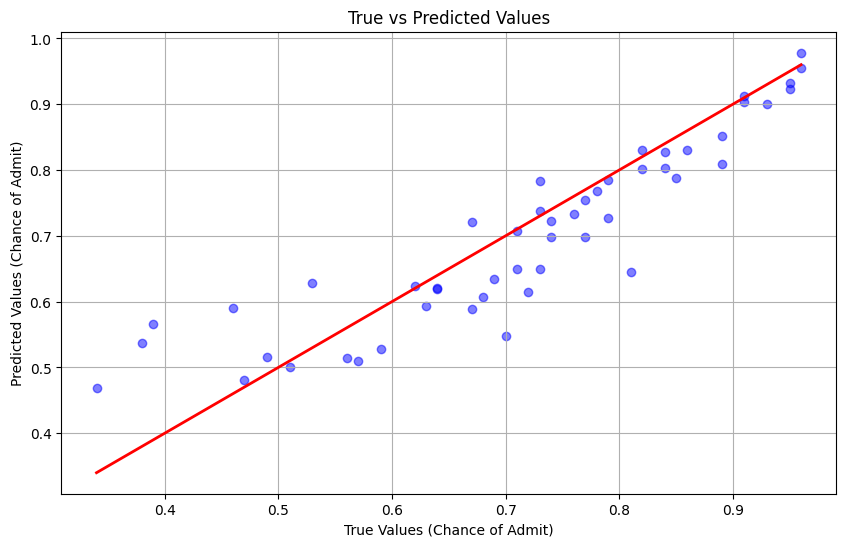

In [16]:
# Sci-kit Learn Linear Regression implementation

# Extract features and target
X_lr_train = train_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y_lr_train = train_data['Chance of Admit'].values  # Use the continuous 'Chance of Admit' for regression

X_lr_test = test_data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y_lr_test = test_data['Chance of Admit'].values  # Use the continuous 'Chance of Admit' for regression

# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_lr_train, y_lr_train)

# Make predictions on the test set
y_lr_pred = linear_model.predict(X_lr_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_lr_test, y_lr_pred)
r2 = r2_score(y_lr_test, y_lr_pred)

# Print metrics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(y_lr_test, y_lr_pred, color='blue', alpha=0.5)
plt.plot([y_lr_test.min(), y_lr_test.max()], [y_lr_test.min(), y_lr_test.max()], color='red', lw=2)
plt.title('True vs Predicted Values')
plt.xlabel('True Values (Chance of Admit)')
plt.ylabel('Predicted Values (Chance of Admit)')
plt.grid()
plt.show()

Accuracy: 0.90
Confusion Matrix:
[[27  1]
 [ 4 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.82      0.88        22

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.90        50
weighted avg       0.90      0.90      0.90        50



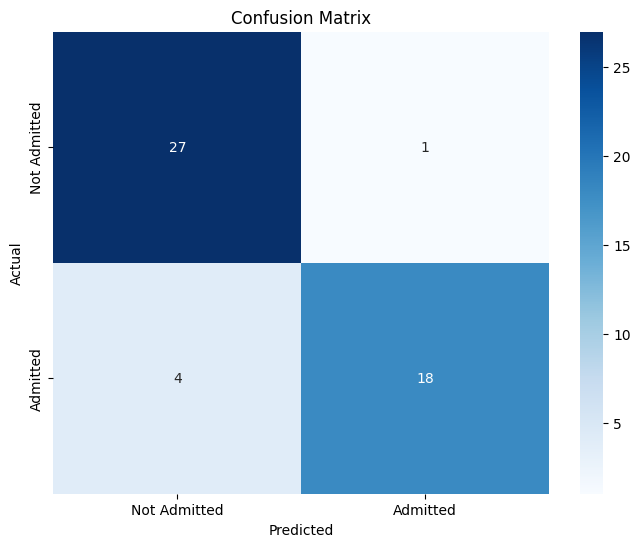

In [17]:
# Sci-kit Learn Gaussian Naive Bayes implementation

# Initialize and fit the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions
y_pred = gnb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Admitted', 'Admitted'], yticklabels=['Not Admitted', 'Admitted'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()